# Análise do componente principal (Principal Component Analysis - PCA)

+ Conhecido como ANALISE DE FATORES
+ ISSO É MUITO, MUITO RELACIONADO À ALGEBRA LINEAR
+ Seção 10.2 do livro 
+ Método nao supervisionado usado para examinar entre n variaveis, identificar sua estrutura basica
+ Em Resumo: 
    + Apartir dele descobrimos quais sao as variaveis masi relevantes para nosso objetivo, e com isso, teornar melhor nosos modelos.
    + é usado para Nalise, e nao modelo
    + é necessario padronizar os dados

Vamos discutir PCA! Uma vez que este não é exatamente um algoritmo de Machine Learning completo, mas apenas um algoritmo de aprendizagem não supervisionado, teremos apenas uma palestra sobre este assunto, mas nenhum projeto completo de Machine Learning (embora possamos trabalhar no conjunto de câncer com PCA).

## Revisão de PCA

Certifique-se de assistir ao de vídeo de apresentação teórica para uma visão geral completa da PCA!
Lembre-se de que o PCA é apenas uma transformação dos seus dados e tenta descobrir quais recursos explicam a maior variação em seus dados. Por exemplo:

<img src='files/PCA.png' />

## Bibliotecas

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

## Os dados (cancer de pulmao do sklearning)
Vamos trabalhar com o conjunto de dados de câncer novamente, pois ele tem muitos atributos.

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [4]:
# Reotrna um Dicionario com
# ['data'] = dados
# targe = se é benigno ou nao
# features_name = nome de colunas
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [5]:
# Descricao dos dados
print(cancer['DESCR'])

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [5]:
 # Criando o DataFrame, pela estrutura de Dic é umpouco mais elaborado
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [6]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## VAMOS USAR PCA PARA ENCONTRS AS 2 PRINCIPAIS VARIAVEIS QUE DETERMINAM O TARGET

## Visualização de PCA

Como observamos antes, é difícil visualizar dados com muitas dimensões. Podemos usar o PCA para encontrar os dois primeiros componentes principais e visualizar os dados neste novo espaço bidimensional, com um único espaço de dispersão. Antes de fazer isso, precisamos escalar nossos dados para que cada parâmetro tenha uma variância unitária.

Isso nao é simples, pois, como sao 30 colunas, nosso dataSet tem 30 DIMENSOES

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [14]:
# Aqui estarei tranformando os dados do DataFrame
# Com isso normalzamos os dado numericos e assim podemos usar PCA
scaled_data = scaler.transform(df)

O PCA com o Scikit Learn usa um processo muito semelhante a outras funções de pré-processamento que acompanham o SciKit Learn. Nós instanciamos um objeto PCA, localizamos os componentes principais usando o método de ajuste e, em seguida, aplicamos a rotação e a redução da dimensionalidade chamando transform().

Também podemos especificar quantos componentes queremos manter ao criar o objeto PCA.

In [11]:
# Importando PCA
from sklearn.decomposition import PCA

In [12]:
# Vamos procuurar 2 compoentes(achar 2 componetnes mais principais)
pca = PCA(n_components=2)

In [15]:
# treinando o PCA
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Agora, podemos transformar esses dados em seus dois primeiros componentes principais.

In [16]:
# vou tranformar denovo
x_pca = pca.transform(scaled_data)

In [15]:
# scaled_data Antigo = Tinha 569 rows AND 30 Columns
scaled_data.shape

(569, 30)

In [17]:
# APOS PCA = tem 569 ROWS e 2 COLUMNS
x_pca.shape
# Observe que, com 2 dimesnoes, podemos plotar pontos
# Apesar disso, ainda nao sabermos o que esse dois coponetnes significam

(569, 2)

Ótimo! Reduzimos 30 dimensões para apenas 2! Vamos oplotar essas duas dimensões.

Text(0,0.5,'Second Principal Component')

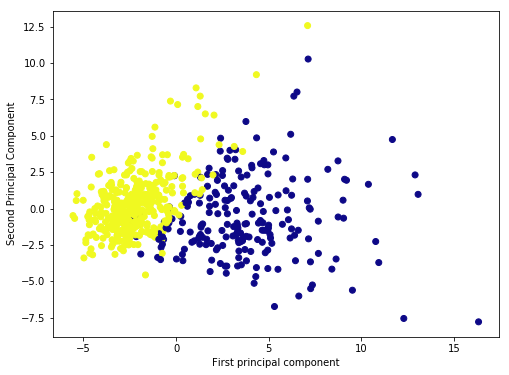

In [18]:
plt.figure(figsize = (8,6))
plt.scatter(x_pca[:,0], x_pca[:,1],
            c = cancer['target'], cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
# Com dois componentes, convertermos de 30 dimensoes para 2, veja
# que traçanndo scatter plot, usando eles há até mesmo a divisao
# entre os tumores benignos e malignos

Claramente, usando esses dois componentes, podemos separar facilmente essas duas classes.

## Interpretando os componentes

Infelizmente, com este grande poder de redução da dimensionalidade, vem o custo de poder entender o que esses componentes representam.

Os componentes correspondem a combinações dos recursos originais. Os próprios componentes são armazenados como um atributo do objeto PCA ajustado:

In [55]:
pca.components_
# Isso é: <2 rows por 30 columns>
# Cada valor fala sobre a correlaçao entre a varialvel e a importanci a para o modelo

array([[-0.21890244, -0.10372458, -0.22753729, -0.22099499, -0.14258969,
        -0.23928535, -0.25840048, -0.26085376, -0.13816696, -0.06436335,
        -0.20597878, -0.01742803, -0.21132592, -0.20286964, -0.01453145,
        -0.17039345, -0.15358979, -0.1834174 , -0.04249842, -0.10256832,
        -0.22799663, -0.10446933, -0.23663968, -0.22487053, -0.12795256,
        -0.21009588, -0.22876753, -0.25088597, -0.12290456, -0.13178394],
       [ 0.23385713,  0.05970609,  0.21518136,  0.23107671, -0.18611302,
        -0.15189161, -0.06016536,  0.0347675 , -0.19034877, -0.36657547,
         0.10555215, -0.08997968,  0.08945723,  0.15229263, -0.20443045,
        -0.2327159 , -0.19720728, -0.13032156, -0.183848  , -0.28009203,
         0.21986638,  0.0454673 ,  0.19987843,  0.21935186, -0.17230435,
        -0.14359317, -0.09796411,  0.00825724, -0.14188335, -0.27533947]])

Nessa matriz numérica, cada linha representa um componente principal e cada coluna se relaciona com os recursos originais. podemos visualizar esta relação com um mapa de calor:

In [20]:
# Vamos usar mapa de calor para ver a importantcia melhor deles
df_comp = pd.DataFrame(pca.components_,columns=cancer['feature_names'])
df_comp.head()
# vendo a correlaçao das colunas

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


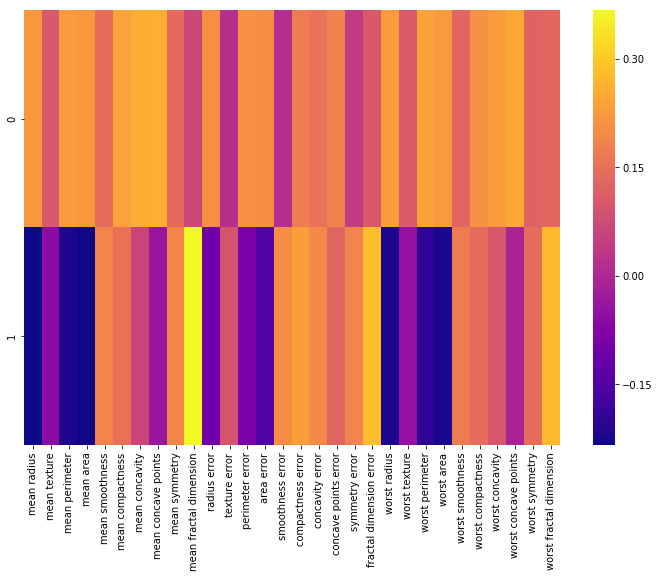

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(df_comp, cmap = 'plasma')

# Vantagem
+ Podemos entao descartar variaveis que geram ruido
---
# Quando Usar
+ PCA é útil quando temos um sistema de parâmetros de alta dimensionalidade e precisamos simplificar o mesmo
+ A Análise de Componentes Principais é uma técnica de redução de dimensão. Normalmente, estamos envolvidos por dados com um grande número de variáveis, algumas das quais podem estar correlacionadas. Essa correlação entre variáveis traz uma redundância nas informações que podem ser coletadas pelo conjunto de dados. Assim, para reduzir as complexidades computacionais e de custos, usamos PCA para transformar as variáveis originais na combinação linear dessas variáveis que são independentes.
---
# POR FIM, serve para descobrir quais sao as variavaeis mais imporantes, mas nao informa para cada classe,